<a href="https://colab.research.google.com/github/bennetthamilton/Bennett_Hamilton_Jupyters/blob/main/CS_325_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Bennett Hamilton
hamibenn@oregonstate.edu
Programming Exercise 1
CS 325 Algorithms Spring 2023
```





---


**Part Zero**: Front matter and helper functions

Read over this code. You should not make any changes.


---



In [ ]:
# import libraries
import time 
from numpy.random import seed 
from numpy.random import randint 
import matplotlib.pyplot as plt

In [ ]:
# GLOBAL VARIABLES

# lists to store functions and their names (string)
f_list = []
f_name_list = []

In [ ]:
# DATA GENERATION

# function to generate a random list
def random_list(max):
  return randint(0, max, max) 
  
# function to generate a semi-sorted list
def semisorted_list(max):
  last = 0
  lst = []
  for i in range(max):
    cur = randint(-1,5) + last
    lst.append(cur)
    last = cur
  return lst
  
# function to generate a sorted list
def sorted_list(max):
  return list(range(0, max))
 
# function to generate a backwards sorted list
def reversed_list(max):
  lst = list(range(0, max))
  lst.reverse()
  return lst  

In [ ]:
# EXPERIMENT AND GRAPHING

# function that runs a set of functions, times their output, and
#    graphs time vs input size
def time_algorithms(data_f, fs, fnames, experiment):
  if len(fs)!=len(fnames):
    print("Error: functions and name lists must be the same size!")
    return;
  
  fcount = 0
  # initialize graph
  fig, ax1 = plt.subplots()
  ax1.set_title(experiment)
  ax1.set_xlabel('n') 
  ax1.set_ylabel('time (s)')
  
  # for each sorting algorithm
  for f in fs:
    # randomly generates list of different sizes
    elements = list() 
    times = list() 
    # run 10 iterations of the experiment
    for i in range(1, 11): 

        # generate some data
        lst = data_f(50 * i)

        # run the algorithm and time it
        start = time.process_time()
        f(lst) 
        end = time.process_time()

        # save results for graphing
        elements.append(len(lst)) 
        times.append(end-start) 

    # graph the complexity
    ax1.plot(elements, times, label = fnames[fcount])      
    fcount = fcount + 1
    
  # display the graph
  ax1.grid() 
  ax1.legend() 
  fig.show() 



---


**Part One**: Implement sorting algorithms

For each of the following sorting algorithms, complete the code. It is recommended that you consult the pseudocode on Wikipedia for each algorithm.

You may write additional helper functions where necessary. Comment your code!


---



**Exercise 1: Insertion Sort**

Implement insertion sort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Insertion_sort)


In [ ]:
# implementation of insertion sort
# ref: https://www.geeksforgeeks.org/insertion-sort/
def insertion_sort(lst):
  
  # traverse through list starting at 2nd element
  for i in range(1, len(lst)):

    key = lst[i]                       # set key

    # Move elements before key and
    # that are greater than key ahead
    j = i-1                            # element before key
    while j >= 0 and key < lst[j] :    
      lst[j + 1] = lst[j]              # move jth element up one
      j -= 1                           # go to next element behind key

    lst[j + 1] = key                   # reassign key position
        
# add the function to the function list        
f_list.append(insertion_sort)
f_name_list.append("Insertion Sort")        

**Exercise 2: Selection Sort**

Implement selection sort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Selection_sort)



In [ ]:
# implementation of selection sort
# ref: https://www.geeksforgeeks.org/selection-sort/
def selection_sort(lst):

  # traverse through all array elements
  for i in range(len(lst)):
    min_i = i                   
    # find minimum in remaining unsorted array
    for j in range(i+1, len(lst)):
      if lst[min_i] > lst[j]:
        min_i = j
             
    # swap minimum w/ first element       
    lst[i], lst[min_i] = lst[min_i], lst[i]
                 
# add the function to the function list        
f_list.append(selection_sort)
f_name_list.append("Selection Sort")                  

**Exercise 3: Quicksort**

Implement quicksort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Quicksort). 

In [ ]:
# implementation of quick sort
# ref: https://www.geeksforgeeks.org/quick-sort/
#      https://stackoverflow.com/questions/18262306/quicksort-with-python
def quicksort(lst):

  less = []               # temporary lists for sorting
  equal = []
  greater = []

  if len(lst) > 1:

    pivot = lst[0]        # set pivot to last point

    for x in lst:

      if x < pivot:       # append element to less than list
        less.append(x)
      elif x == pivot:    # append element to equal than list
          equal.append(x)
      elif x > pivot:     # append element to greater than list
          greater.append(x)

    # recursively sort left and right lists concatinate sorted list
    return quicksort(less) + equal + quicksort(greater)  

  else:  # handle the part at the end of the recursion - when you only have one element in your array, just return the array.
    
    return lst

# add the function to the function list  
f_list.append(quicksort)
f_name_list.append("Quicksort")


**Exercise 4: Mergesort**

Implement mergesort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Merge_sort).

In [ ]:
# implementation of merge sort
def mergesort(lst):

  if len(lst) > 1:
    
    mid = len(lst)//2   # Finding the mid of the array
    left = lst[:mid]    # dividing list into two
    right = lst[mid:]
    
    mergesort(left)     # sort left recursively
    mergesort(right)    # sort right recursively

    i = j = k = 0       # after sorting all...

    # ...copy data to temp arrays left and right
    while i < len(left) and j < len(right):
      if left[i] <= right[j]:
        lst[k] = left[i]
        i += 1
      else:
        lst[k] = right[j]
        j += 1
      k += 1

    # Checking if any element was left
    while i < len(left):
      lst[k] = left[i]
      i += 1
      k += 1

    while j < len(right):
      lst[k] = right[j]
      j += 1
      k += 1
  
# add the function to the function list  
f_list.append(mergesort)
f_name_list.append("Mergesort")  

**Exercise 5: Pick a Sorting Algorithm**

Choose a sorting algorithm from this list on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm) and implement it.

You may not repeat variants of any of the above sorting algorithms. You may not choose Bubblesort nor Bogosort.

In [ ]:
# implementation of gnome sort
# ref: https://www.geeksforgeeks.org/gnome-sort-a-stupid-one/
def gnomesort(lst):  

  index = 0                             # set index to 0

  # stay in loop until reached the end of the list
  while index < len(lst):
      if index == 0:                    # if at first index, move to next element
          index = index + 1
      if lst[index] >= lst[index - 1]:  # if current element is greater than previous, move to next
          index = index + 1
      else:                             # else swap and move back
          lst[index], lst[index-1] = lst[index-1], lst[index]
          index = index - 1

  return lst
    
# update the variable and algorithm name below  
# add the function to the function list  
f_list.append(gnomesort)
f_name_list.append("Gnome Sort")       # Update with the name

**EXTRA CREDIT**

Add a code block below and implement another sorting algorithm that either:
1.   has complexity O(n log n) or better for the average case, or 
2.   from the list non-comparison sorts on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm#Non-comparison_sorts)



Remember to add the function to the function list so that it will be graphed.

Your extra credit sorting algorithm is worth \[+5 Points]. Detailed comments are expected for full credit.



---


**Part Two**: Experimental Analysis

In this section, you do not have to write any more code. You will test your sorting algorithms above to understand each algorithm's respective behavior under different conditions.

Below are four code blocks. Each will run your sorting algorithms on a different set of data and produce a graph of time vs. input size. Run each block several times to observe the consistant behavior of each sorting algorithm (despite variances of individual trials). 

Below each output, you will write a short paragraph discussing your results.


---







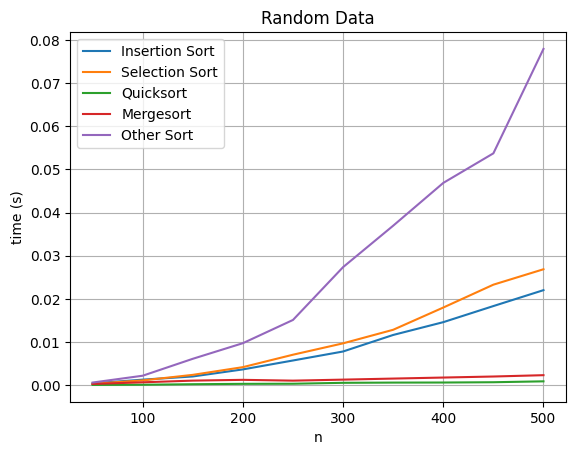

In [ ]:
# run the sorting algorithms on random data
time_algorithms(random_list, f_list, f_name_list, 'Random Data')


**Analysis A: Sorting a Random List**

This test shows an average case for unsorted lists. In terms of efficiency, the graph ranks the sorting algorithms as follows (quickest to slowest): quicksort, merge sort, insertion sort, selection sort, gnome sort. Quicksort and merge sort are close to eachother along with insertion and selection sort. This is a good indication of having the same time complexties (O(nlogn) and O(n^2)). It also makes sense that gnome sort would perform the worst since it has to make the most switches on average.


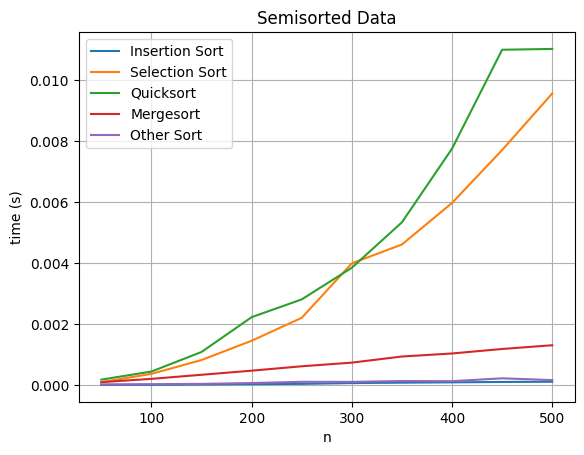

In [ ]:
# run the sorting algorithms on data that is nearly sorted
time_algorithms(semisorted_list, f_list, f_name_list, 'Semisorted Data')


**Analysis B: Almost-Sorted List**

Ranked fastest to slowest: gnome sort, insertion sort, merge sort, selection sort, quicksort. Suprisingly, it seem that the effeciency as flipped for lists that are nearly sorted. It makes sense that insertion and gnome sort would be the fastest in this case since they are both able to run through the lists and quickly make a small change.

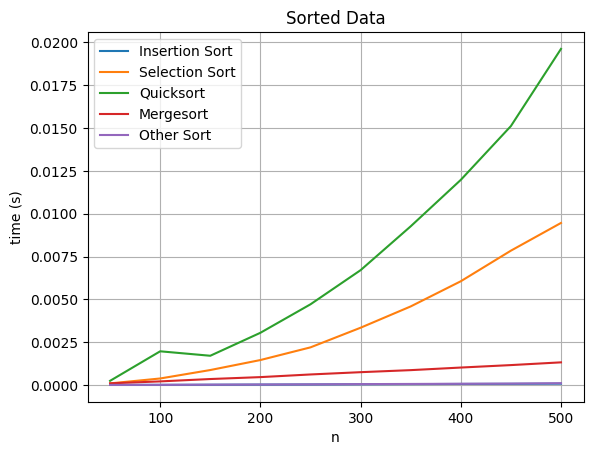

In [ ]:
# run the sorting algorithms on already sorted data
time_algorithms(sorted_list, f_list, f_name_list, 'Sorted Data')


**Analysis C: Sorted List**

For the most part, these results are identical to an almost sorted list. Ranked fastest to slowest: gnome sort, insertion sort, merge sort, selection sort, quicksort. The efficiency in this case is determined by how quickly the alogorithm can traverse through the entire list. Traversal of insertion and gnome sort occurs using a simple for loop and is seperate from the sorting portion, therefore they can be ran the quickest.

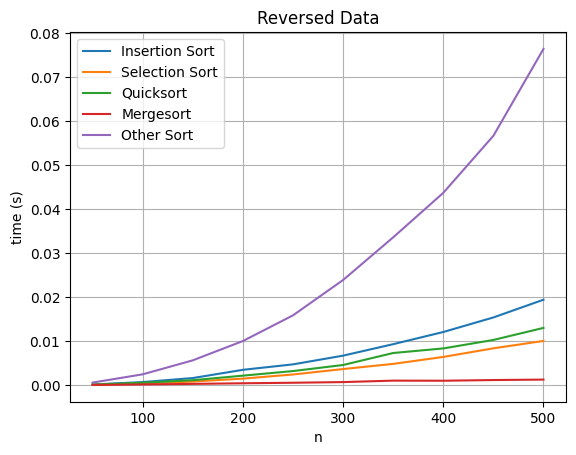

In [ ]:
# run the sorting algorithms on data perfectly reversed
time_algorithms(reversed_list, f_list, f_name_list, 'Reversed Data')


**Analysis D: Reversed List**

Ranked fastest to slowest: merge sort, selection sort, quicksort, insertion sort, gnome sort. Looking at the data we can see that merge sort is the most efficient. And once again gnome sort is the worst since it has to make the most switches.
